<h1>Ejercicio 2.1


Usted es el gerente de una fábrica que produce dos tipos de productos: A y B. La fábrica tiene recursos limitados, incluidas las horas de trabajo y las materias primas. Su objetivo es maximizar las ganancias mientras satisface la demanda de ambos productos. 
Para eso usted recolecta los siguientes datos: 

● El producto A requiere 2 horas de mano de obra y 3 unidades de materia prima por unidad. 
● El producto B requiere 4 horas de mano de obra y 2 unidades de materia prima por unidad. 
● Tiene un total de 100 horas de mano de obra y 120 unidades de materia prima disponibles. 
● La ganancia del producto A es de $10 por unidad y la del producto B es de $15 por unidad. 
Usted sabe que la función que desea maximizar es la de la ganancia (10x+15y, donde x=producto A, y = producto B) Responda: 

Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad 

    - Mano de obra: 2x + 4y <= 100
    - Materia prima: 3x + 2y <= 120
    - No-negatividad: x >= 0, y >= 0

Usando programación lineal, determine cuántas unidades de cada producto se deben producir para maximizar la ganancia y cumplir con las restricciones de recursos. 
Escriba un script en Python o en otro lenguaje de programación de su preferencia 
Interprete el resultado 


In [5]:
from pulp import LpMaximize, LpProblem, LpVariable

# Define el problema
model = LpProblem(name="max-profit", sense=LpMaximize)

# Define las variables
a = LpVariable(name="x", lowBound=0)  # Producto A
b = LpVariable(name="y", lowBound=0)  # Producto B

# Agrega las restricciones al modelo
model += (2 * a + 4 * b <= 100, "mano_de_obra")
model += (3 * a + 2 * b <= 120, "materia_prima")

# Define la función objetivo
model += 10 * a + 15 * b

# Resuelve el problema
model.solve()

# Imprime el resultado
print(f"Producto A (a): {ProductoA.varValue}")
print(f"Producto B (b): {ProductoB.varValue}")
print(f"Ganancia máxima: ${model.objective.value()}")


Producto A (a): 35.0
Producto B (b): 7.5
Ganancia máxima: $462.5


Muestre una gráfica del feasible area mostrando el punto donde está su respuesta 

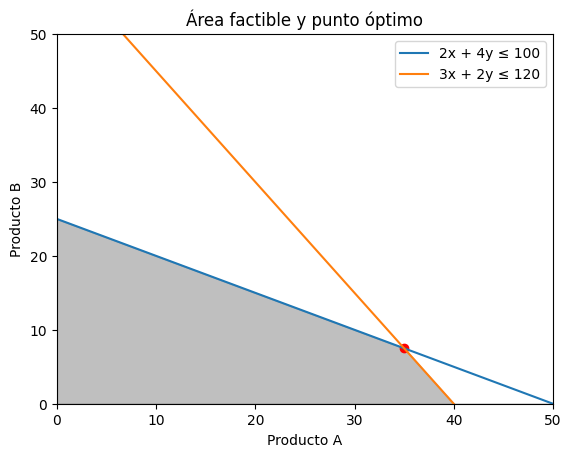

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Valores para x
x_vals = np.linspace(0, 50, 500)

# Despeja y para cada restricción
y1_vals = (100 - 2*x_vals) / 4
y2_vals = (120 - 3*x_vals) / 2

plt.plot(x_vals, y1_vals, label='2x + 4y ≤ 100')
plt.plot(x_vals, y2_vals, label='3x + 2y ≤ 120')
plt.fill_between(x_vals, 0, np.minimum(y1_vals, y2_vals), color='gray', alpha=0.5)
plt.scatter(x.varValue, y.varValue, color='red')  # punto óptimo
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('Producto A')
plt.ylabel('Producto B')
plt.legend()
plt.title('Área factible y punto óptimo')
plt.show()


<h1>Ejercicio 2.2

Está administrando la asignación de recursos en un proyecto que involucra tres tareas: Tarea A, Tarea B y Tarea C. Cada tarea requiere una cantidad diferente de tiempo y personal para completarse. Su objetivo es asignar recursos a estas tareas de una manera que maximice la ganancia total y satisfaga las restricciones del proyecto. Usted sabe lo siguiente 

● Tarea A: 

    ○ Requiere 2 horas de trabajo y 1 personal 
    ○ Produce una ganancia de $ 1500 al finalizar 

● Tarea B: 

    ○ Requiere 3 horas de trabajo y 2 personas 
    ○ Produce una ganancia de $ 2500 al finalizar 

● Tarea C: 

    ○ Requiere 5 horas de trabajo y 3 personas 
    ○ Produce una ganancia de $ 4000 al finalizar 

Tiene un total de 15 horas de trabajo y 10 personas disponibles. Formule esto como un problema de programación lineal para maximizar la ganancia 
total respetando las restricciones de recursos. Resuelva el problema y determine la asignación óptima de recursos para cada tarea. Escriba un script 
en Python o en otro lenguaje de programación de su preferencia y responda 


Escriba la fórmula de la función que debe maximizar 

    E[1500a+2500b+4000c]

Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad 

    - Horas de trabajo: 2a + 3b + 5c <= 15
    - Personal: a + 2b + 3c <= 10   
    - No-negatividad: a >= 0, b >= 0, c >= 0

Determine las cantidades de asignación óptima. Interprete el resultado 
¿Podría dibujar la feasible region? De ser sí, ¿Cómo? De ser no, ¿por qué?

    No es posible dibujar la region debido a que son 3 variables las que estamos tomando en cuenta y por lo tanto necesitariamos un espacio tridimensional para poder ver los resultados graficamente. Es por ello que solo podemos quedarnos con la interpretacion y representación numérica. 

In [7]:
from pulp import LpMaximize, LpProblem, LpVariable

# Definir el problema
model = LpProblem(name="max-profit-tasks", sense=LpMaximize)

# Definir las variables
a = LpVariable(name="a", lowBound=0, cat='Integer')  # Tarea A
b = LpVariable(name="b", lowBound=0, cat='Integer')  # Tarea B
c = LpVariable(name="c", lowBound=0, cat='Integer')  # Tarea C

# Agregar restricciones al modelo
model += (2 * a + 3 * b + 5 * c <= 15, "hours")
model += (a + 2 * b + 3 * c <= 10, "personnel")

# Definir la función objetivo
model += 1500 * a + 2500 * b + 4000 * c

# Resolver el problema
model.solve()

# Imprimir resultado
print(f"Tarea A: {a.varValue}")
print(f"Tarea B: {b.varValue}")
print(f"Tarea C: {c.varValue}")
print(f"Ganancia máxima: ${model.objective.value()}")

Tarea A: 0.0
Tarea B: 5.0
Tarea C: 0.0
Ganancia máxima: $12500.0


# Ejercicio 2.3

Usted es gerente de producción en una empresa que fabrica tres tipos de productos: Producto A, Producto B y Producto C. Cada producto requiere diferentes cantidades de materias primas, mano de obra y tiempo de máquina
para producir. Tiene recursos limitados para materias primas, mano de obra y tiempo de máquina, y desea
optimizar la combinación de producción para maximizar las ganancias de su empresa. Usted sabe lo siguiente:

- Producto A:
    - Requiere 2 unidades de materias primas, 3 horas de mano de obra y 4 horas de tiempo de máquina
    - Se vende a $300 por unidad
    - Cada unidad tiene un costo de $100
- Producto B:
    - Requiere 1 unidad de materia prima, 2 horas de mano de obra y 3 horas de tiempo de máquina
    - Se vende a $ 500 por unidad
    - Cada unidad tiene un costo de $200
- Producto C:
    - Requiere 3 unidades de materias primas, 4 horas de mano de obra y 6 horas de tiempo de máquina
    - Se vende a $700 por unidad
    - Cada unidad tiene un costo de $200
Usted tiene 100 unidades de materias primas, 120 horas de mano de obra y 150 horas de tiempo de máquina
disponibles. Formule esto como un problema de programación lineal y resuélvalo para encontrar las cantidades de
producción óptimas para obtener el máximo beneficio.
Escriba un script en Python o en otro lenguaje de programación de su preferencia y responda
1. Escriba la fórmula de la función que debe maximizar


In [3]:
from pulp import LpProblem, LpMaximize, LpVariable


prob = LpProblem("Maximize_Profit", LpMaximize)

x_A = LpVariable("x_A", lowBound=0, cat="Integer")
x_B = LpVariable("x_B", lowBound=0, cat="Integer")
x_C = LpVariable("x_C", lowBound=0, cat="Integer")

prob += 200 * x_A + 300 * x_B + 500 * x_C, "Total_Profit"
prob += 2 * x_A + x_B + 3 * x_C <= 100, "Materias_Primas"
prob += 3 * x_A + 2 * x_B + 4 * x_C <= 120, "Mano_de_Obra"
prob += 4 * x_A + 3 * x_B + 6 * x_C <= 150, "Tiempo_de_Maquina"

print("Función Objetivo: 200 * x_A + 300 * x_B + 500 * x_C")
print("Restricción Materias Primas: 2 * x_A + x_B + 3 * x_C <= 100")
print("Restricción Mano de Obra: 3 * x_A + 2 * x_B + 4 * x_C <= 120")
print("Restricción Tiempo de Máquina: 4 * x_A + 3 * x_B + 6 * x_C <= 150")

Función Objetivo: 200 * x_A + 300 * x_B + 500 * x_C
Restricción Materias Primas: 2 * x_A + x_B + 3 * x_C <= 100
Restricción Mano de Obra: 3 * x_A + 2 * x_B + 4 * x_C <= 120
Restricción Tiempo de Máquina: 4 * x_A + 3 * x_B + 6 * x_C <= 150


2. Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad

In [1]:
from pulp import LpProblem, LpMaximize, LpVariable


prob = LpProblem("Maximize_Profit", LpMaximize)

x_A = LpVariable("x_A", lowBound=0, cat="Integer")
x_B = LpVariable("x_B", lowBound=0, cat="Integer")
x_C = LpVariable("x_C", lowBound=0, cat="Integer")

prob += 2 * x_A + x_B + 3 * x_C <= 100, "Materias_Primas"

prob += 3 * x_A + 2 * x_B + 4 * x_C <= 120, "Mano_de_Obra"

prob += 4 * x_A + 3 * x_B + 6 * x_C <= 150, "Tiempo_de_Maquina"

prob += x_A >= 0, "NonNegativity_A"
prob += x_B >= 0, "NonNegativity_B"
prob += x_C >= 0, "NonNegativity_C"

print("Restricción de materias primas:", 2 * x_A + x_B + 3 * x_C, "<=", 100)
print("Restricción de mano de obra:", 3 * x_A + 2 * x_B + 4 * x_C, "<=", 120)
print("Restricción de tiempo de máquina:", 4 * x_A + 3 * x_B + 6 * x_C, "<=", 150)




Restricción de materias primas: 2*x_A + x_B + 3*x_C <= 100
Restricción de mano de obra: 3*x_A + 2*x_B + 4*x_C <= 120
Restricción de tiempo de máquina: 4*x_A + 3*x_B + 6*x_C <= 150


3. Determine las cantidades de producción óptimas y el máximo beneficio. Interprete el resultado

In [2]:
from pulp import LpProblem, LpMaximize, LpVariable

prob = LpProblem("Maximize_Profit", LpMaximize)

x_A = LpVariable("x_A", lowBound=0, cat="Integer")
x_B = LpVariable("x_B", lowBound=0, cat="Integer")
x_C = LpVariable("x_C", lowBound=0, cat="Integer")

prob += 200 * x_A + 300 * x_B + 500 * x_C, "Total_Profit"

prob += 2 * x_A + x_B + 3 * x_C <= 100, "Materias_Primas"

prob += 3 * x_A + 2 * x_B + 4 * x_C <= 120, "Mano_de_Obra"

prob += 4 * x_A + 3 * x_B + 6 * x_C <= 150, "Tiempo_de_Maquina"

prob.solve()

print("Cantidad óptima de Producto A:", x_A.varValue)
print("Cantidad óptima de Producto B:", x_B.varValue)
print("Cantidad óptima de Producto C:", x_C.varValue)
print("Maximo beneficio:", prob.objective.value())


Cantidad óptima de Producto A: 0.0
Cantidad óptima de Producto B: 50.0
Cantidad óptima de Producto C: 0.0
Maximo beneficio: 15000.0


Utilizando las formulas del inciso 1 se procede a obtener los valores óptimo  de cada producto al igual que el máximo beneficio. Y de ambos, se puede apreciar que el producto B es el que mayor beneficio da. Por lo que el maximo beneficio proviene exclusivamente del Producto B y los otros debe de someterse a análisis de costos y beneficios. <br/>

Se utilizaron herramientas cómo You.com al momento de explorar las opciones de librerias que permitan la facilidad de este ejercicio, el cual resulto en explorar la documentación de pulp y sus funciones.
